<a href="https://colab.research.google.com/github/JackSparrow-333/Face-Recognition/blob/master/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [77]:
parkinsons_data = pd.read_csv('/content/sample_data/parkinsons.data')

In [78]:
parkinsons_data.head()
parkinsons_data.shape
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [79]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [80]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)

In [81]:
Y = parkinsons_data['status']
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [83]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [84]:
scalar = StandardScaler()
scalar.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [85]:
model = svm.SVC(kernel='linear',C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale',max_iter=-1,random_state=None,shrinking=True,tol=0.001,verbose=False)
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [86]:
model3 = svm.SVC(kernel='linear',C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3, gamma='scale',
 max_iter=-1, random_state=None, shrinking=True,
 tol=0.001, verbose=False) 
model3.fit(X_test, Y_test)

SVC(kernel='linear')

In [87]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
model2 = RandomForestRegressor(random_state=1, max_depth=10,bootstrap=True, ccp_alpha=0.0, criterion='mse',
  max_features='auto', max_leaf_nodes=None,
 max_samples=None,
  min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, n_jobs=None, oob_score=False,
  verbose=0, warm_start=False)
model2.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=10, random_state=1)

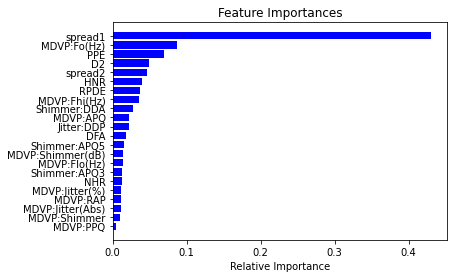

In [88]:
features = X.columns
importance = model2.feature_importances_
indices = np.argsort(importance)[0:] # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

In [89]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.8846153846153846
Accuracy score of test data :  0.8717948717948718


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
svm=cross_val_score(SVC(),X_train,Y_train)
print('svm',svm,svm.mean()) 
dtc=cross_val_score(DecisionTreeClassifier(),X_train,Y_train)
print('dtc',dtc,dtc.mean()) 
adb=cross_val_score(AdaBoostClassifier(),X_train,Y_train)
print('adb',adb,adb.mean()) 
lr=cross_val_score(LogisticRegression(),X_train,Y_train)
print('log reg',lr,lr.mean()) 

svm [0.84375    0.83870968 0.90322581 0.83870968 0.87096774] 0.8590725806451613
dtc [0.84375    0.77419355 0.90322581 0.74193548 0.87096774] 0.8268145161290322
adb [0.84375    0.87096774 0.87096774 0.80645161 0.80645161] 0.839717741935484
log reg [0.78125    0.83870968 0.87096774 0.80645161 0.83870968] 0.827217741935484


<function matplotlib.pyplot.show>

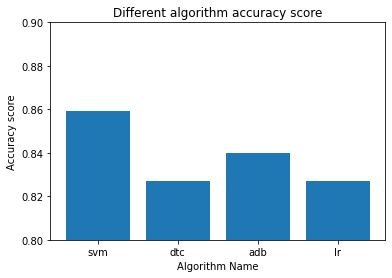

In [91]:
import matplotlib.pyplot as plt
x=['svm','dtc','adb','lr']
y=[svm.mean(), dtc.mean(), adb.mean(), lr.mean()]
plt.bar(x,y)
plt.xlabel('Algorithm Name')
plt.ylabel("Accuracy score")
plt.title('Different algorithm accuracy score')
plt.ylim(0.80, 0.90)
plt.show

In [92]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,
0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-
7.348300,0.177551,1.743867,0.085569) 
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the data
std_data = scalar.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)
if prediction[0] == 0 :
 print("The Person does not have Parkinsons Disease")
else:
 print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [98]:
input_data = (109.86000,126.35800,104.43700,0.00874,0.00008,0.00398,0.00539,0.01193,0.03209,0.30700,0.01789,0.01992,0.02454,0.05368,0.01180,20.76700,
              0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834)

input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the data
std_data = scalar.transform(input_data_reshaped)
prediction = model3.predict(std_data)
print(prediction)
if (prediction[0] == 0):
 print("The Person does not have Parkinsons Disease")
else:
 print("The Person has Parkinsons") 


[1]
The Person has Parkinsons


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
